# Machine Learning Project: Predicting Last Traded Price (LTP)

**Name:** Francis Jose  
**Organization:** Entri Elevate  
**Date:** August 16, 2024

---

## Overview of Problem Statement

In this project, I aim to predict the Last Traded Price (LTP) of a stock using historical data and various machine learning models. Accurate prediction of LTP can be beneficial for traders and investors to make informed decisions.

---

## Objective

The objective of this project is to build a predictive model that can accurately forecast the Last Traded Price (LTP) of a stock based on historical data and other relevant features. By using different machine learning algorithms and techniques, we aim to find the best model for this task.

---

## Data Description

### Source
The dataset used in this project is from Kaggle: [ITC-NSE 24 Year Stock Data](https://www.kaggle.com/datasets/sanyamgoyal401/itc-nse-24-year-stock-datale)

### Features
The dataset contains the following features:
- **Date**: The date of the stock data
- **Series**: The type of stock series (e.g., EQ for equity)
- **Open**: Opening price of the stock on the given date
- **High**: Highest price of the stock on the given date
- **Low**: Lowest price of the stock on the given date
- **Prev. Close**: Previous closing price of the stock
- **LTP**: Last traded price of the stock
- **Close**: Closing price of the stock on the given date
- **VWAP**: Volume-weighted average price
- **52W H**: 52-week high price
- **52W L**: 52-week low price
- **Volume**: Number of shares traded
- **Value**: Total value of shares traded
- **No of Trades**: Number of trades executed

## Data Preprocessing

### Cleaning the Data

In [54]:
import pandas as pd

# Verify the file path
file_path = r'C:\Users\Franzy\Documents\FranZy\Enri Data Science\Capstone Project\ITC-EQ-01-04-2000-to-31-03-2024.csv'

try:
    # Attempt to load the dataset
    data = pd.read_csv(file_path, encoding='utf-8')
    print("Dataset loaded successfully.")
    
    # Display the first few rows of the dataset
    print(data.head())
except FileNotFoundError:
    print(f"File not found: {file_path}")
except pd.errors.ParserError:
    print("Error parsing the file. Check the file format.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully.
         date series   open   high     low  prev._close     ltp   close  \
0  2000-04-03     EQ  739.9  800.8  721.05       741.45  792.75  797.00   
1  2000-04-04     EQ  785.0  785.0  733.25       797.00  733.25  733.25   
2  2000-04-05     EQ  680.0  740.0  675.05       733.25  696.10  698.75   
3  2000-04-06     EQ  705.0  711.0  646.10       698.75  685.00  682.80   
4  2000-04-07     EQ  682.0  733.9  682.00       682.80  730.00  730.95   

     vwap   52w_h  52w_l   volume         value  no_of_trades  
0  772.76  1140.8  580.0  1720025  1.329165e+09           NaN  
1  744.37  1140.8  580.0   581309  4.327067e+08           NaN  
2  700.53  1140.8  580.0   706269  4.947637e+08           NaN  
3  676.06  1140.8  580.0   431386  2.916423e+08           NaN  
4  722.23  1140.8  580.0  1087357  7.853181e+08           NaN  


In [55]:
# Convert 'value' column to float and display in standard numeric format
pd.options.display.float_format = '{:.2f}'.format

# Display the first few rows to verify the change
print(data.head())

         date series   open   high    low  prev._close    ltp  close   vwap  \
0  2000-04-03     EQ 739.90 800.80 721.05       741.45 792.75 797.00 772.76   
1  2000-04-04     EQ 785.00 785.00 733.25       797.00 733.25 733.25 744.37   
2  2000-04-05     EQ 680.00 740.00 675.05       733.25 696.10 698.75 700.53   
3  2000-04-06     EQ 705.00 711.00 646.10       698.75 685.00 682.80 676.06   
4  2000-04-07     EQ 682.00 733.90 682.00       682.80 730.00 730.95 722.23   

    52w_h  52w_l   volume         value  no_of_trades  
0 1140.80 580.00  1720025 1329164700.35           NaN  
1 1140.80 580.00   581309  432706684.55           NaN  
2 1140.80 580.00   706269  494763659.20           NaN  
3 1140.80 580.00   431386  291642272.40           NaN  
4 1140.80 580.00  1087357  785318069.15           NaN  


In [56]:
# Data Cleaning: Handling Missing Values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 date               0
series             0
open               0
high               0
low                0
prev._close        0
ltp                0
close              0
vwap               0
52w_h             16
52w_l             16
volume             0
value              0
no_of_trades    2788
dtype: int64


In [57]:
# Check the number of rows and columns
rows, columns = data.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 5981 rows and 14 columns.


In [58]:
# Display missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with the mean for numeric columns 
data['52w_h'] = data['52w_h'].fillna(data['52w_h'].mean())
data['52w_l'] = data['52w_l'].fillna(data['52w_l'].mean())
data['no_of_trades'] = data['no_of_trades'].fillna(data['no_of_trades'].mean())

# Verify that there are no missing values 
missing_values = data.isnull().sum()
print("Missing values after imputation:\n", missing_values)

Missing values in each column:
 date               0
series             0
open               0
high               0
low                0
prev._close        0
ltp                0
close              0
vwap               0
52w_h             16
52w_l             16
volume             0
value              0
no_of_trades    2788
dtype: int64
Missing values after imputation:
 date            0
series          0
open            0
high            0
low             0
prev._close     0
ltp             0
close           0
vwap            0
52w_h           0
52w_l           0
volume          0
value           0
no_of_trades    0
dtype: int64


In [59]:
# Display basic statistics for the 'no_of_trades' column
print(data['no_of_trades'].describe())

count     5981.00
mean    108612.63
std      50256.33
min       1425.00
25%      90193.00
50%     108612.63
75%     108612.63
max     734612.00
Name: no_of_trades, dtype: float64


In [60]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5981 entries, 0 to 5980
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          5981 non-null   object 
 1   series        5981 non-null   object 
 2   open          5981 non-null   float64
 3   high          5981 non-null   float64
 4   low           5981 non-null   float64
 5   prev._close   5981 non-null   float64
 6   ltp           5981 non-null   float64
 7   close         5981 non-null   float64
 8   vwap          5981 non-null   float64
 9   52w_h         5981 non-null   float64
 10  52w_l         5981 non-null   float64
 11  volume        5981 non-null   int64  
 12  value         5981 non-null   float64
 13  no_of_trades  5981 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 654.3+ KB
None


In [61]:
# Display basic statistics of the dataset
print(data.describe())

         open    high     low  prev._close     ltp   close    vwap   52w_h  \
count 5981.00 5981.00 5981.00      5981.00 5981.00 5981.00 5981.00 5981.00   
mean   405.04  410.47  399.33       404.87  404.78  404.81  404.97  554.71   
std    309.51  314.17  305.16       309.62  309.53  309.59  309.76  450.25   
min    115.00  116.20  114.40       115.45  115.50  115.45  115.39  194.80   
25%    206.40  208.40  203.85       206.05  206.20  206.25  205.97  271.00   
50%    281.85  284.00  278.50       281.55  281.50  281.55  281.33  367.70   
75%    443.40  446.85  439.70       442.90  443.10  442.90  443.04  782.65   
max   1946.00 1964.80 1916.30      1940.10 1940.00 1940.10 1933.79 1964.80   

        52w_l       volume          value  no_of_trades  
count 5981.00      5981.00        5981.00       5981.00  
mean   295.90   8436509.79  2218858006.29     108612.63  
std    192.02  10639339.02  2644908318.13      50256.33  
min    114.40      6797.00     5340131.75       1425.00  
25%    

## Visualizations

### Initial Understandings

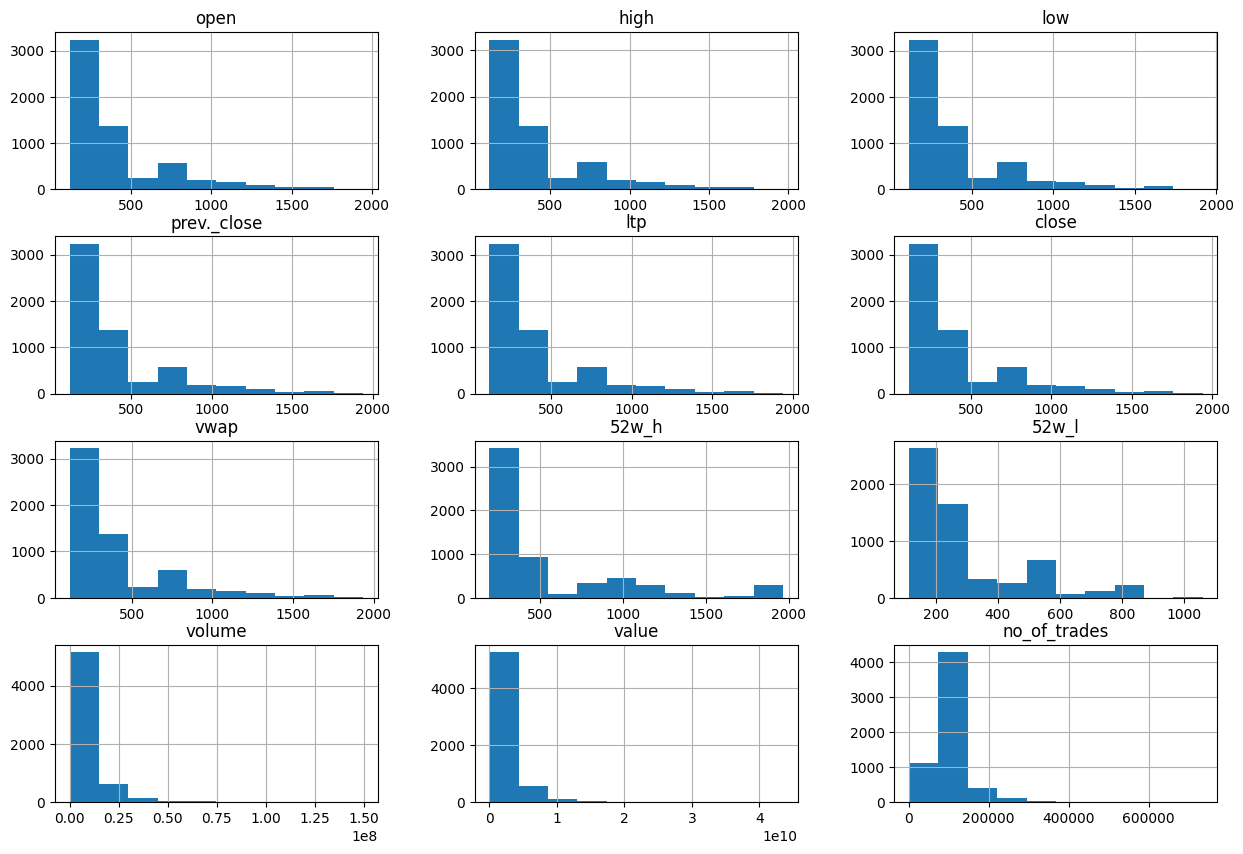

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram
data.hist(figsize=(15, 10))
plt.show()

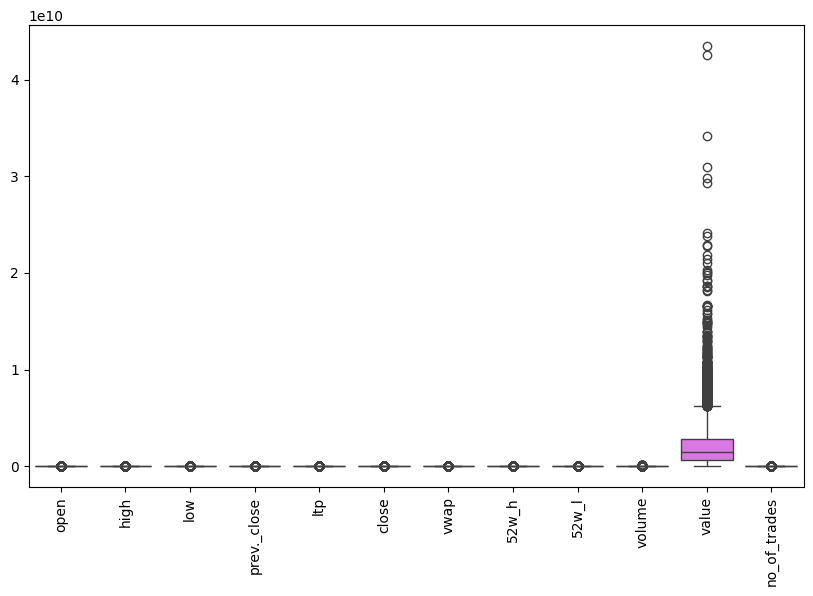

In [29]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

### A pair plot (short for pairwise plot) is a visualization tool in data analysis that shows the pairwise relationships between variables in a dataset. It’s particularly useful for understanding the distribution of data and the relationships between multiple variables at once.

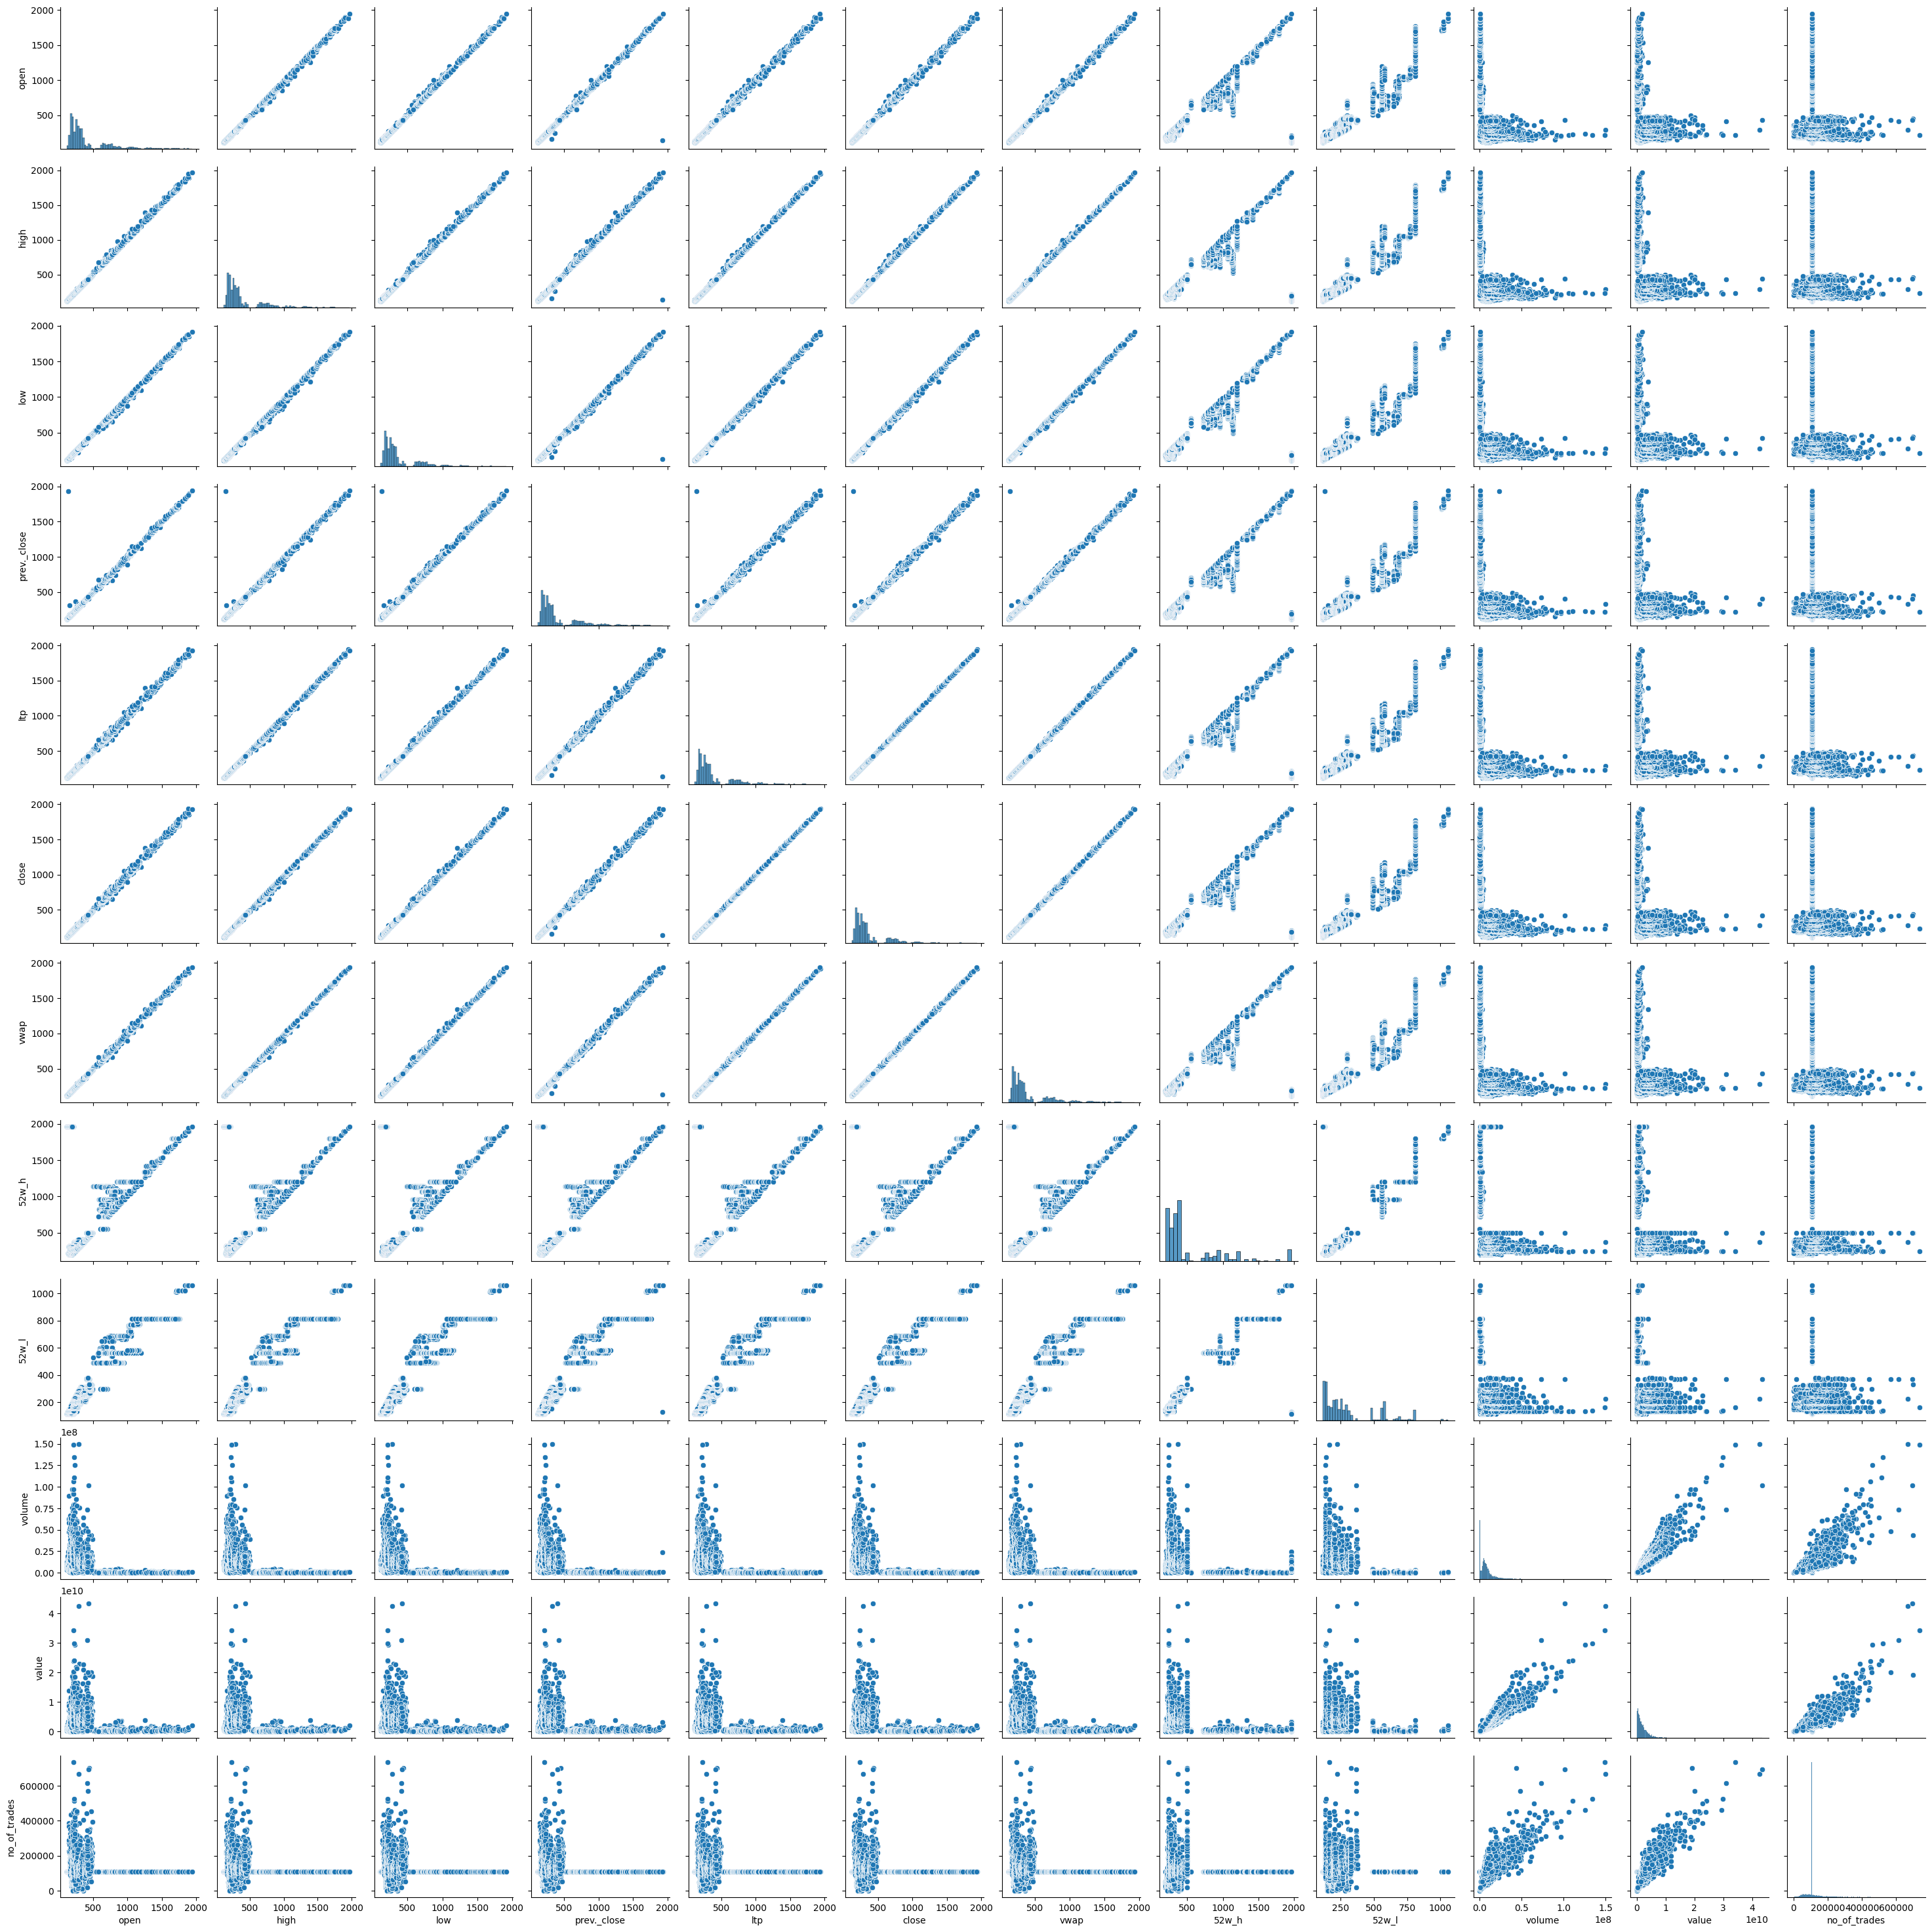

In [30]:
# Pair Plot
sns.pairplot(data)
plt.show()

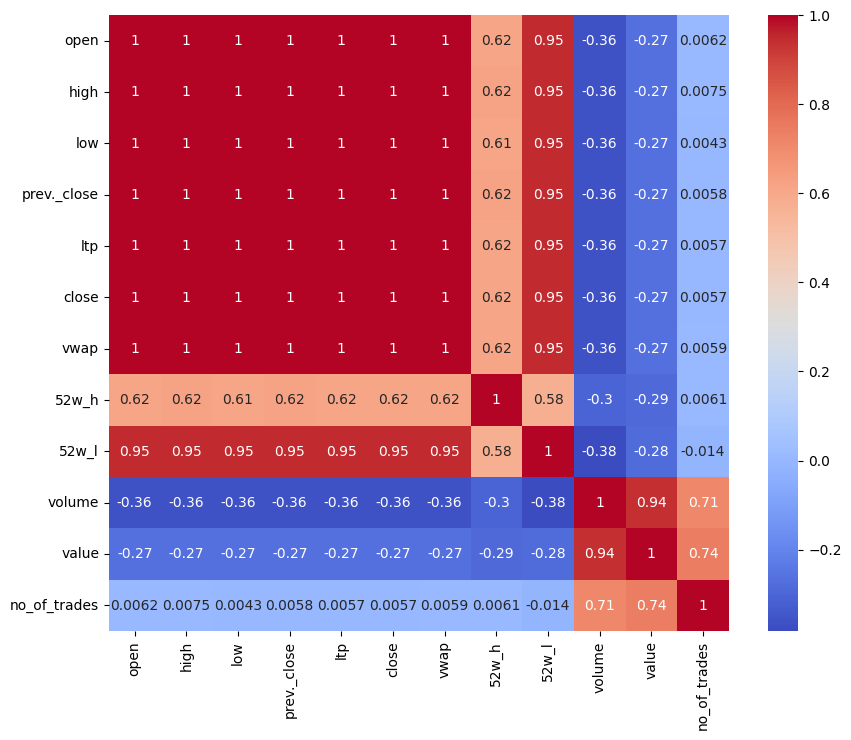

In [31]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[float, int])

# Heatmap Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

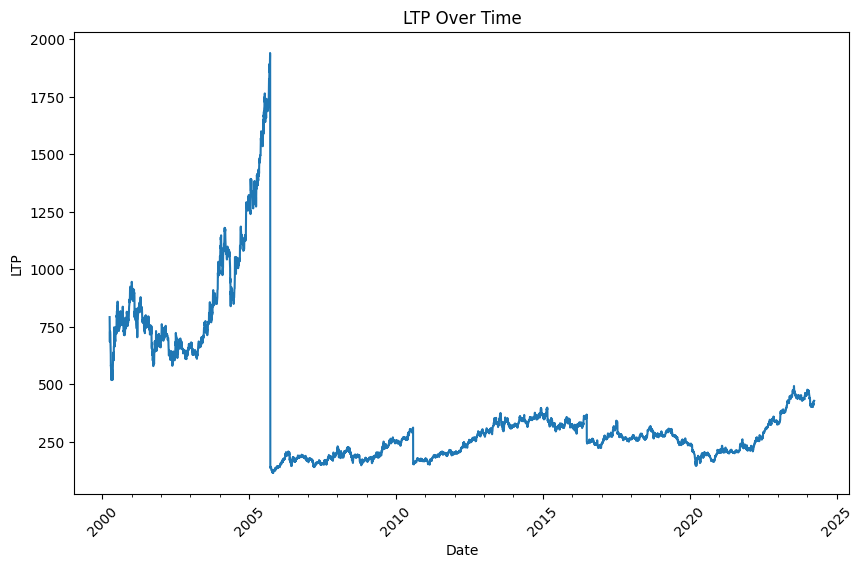

In [32]:
import matplotlib.dates as mdates

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['ltp'])
plt.xlabel('Date')
plt.ylabel('LTP')
plt.title('LTP Over Time')

# Improve x-axis labels
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Major ticks every 5 years
plt.gca().xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.show()

In [62]:
# Check if the 'series' column contains only one unique value
unique_series_values = data['series'].unique()
print(f"Unique values in 'series': {unique_series_values}")

# Since 'series' column contains only one unique value, drop it
if len(unique_series_values) == 1:
    data = data.drop(columns=['series'])
    print("'series' column dropped as it contains only one unique value.")
else:
    print("'series' column retained as it contains multiple unique values.")

Unique values in 'series': ['EQ']
'series' column dropped as it contains only one unique value.


### Reasons to Keep the Date Column:

#### Temporal Trends: Captures time-dependent patterns like trends and seasonality.
#### Advanced Time Series Analysis: Essential for models that handle temporal dependencies (e.g., ARIMA, LSTM).
#### Model Explainability: Helps in understanding and explaining predictions over time.
#### Feature Engineering: Can be used to create additional features, such as lags or moving averages.

In [63]:
# Convert 'date' column to datetime format 
data['date'] = pd.to_datetime(data['date'])

# Extract features from the 'date' column
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek

# Drop the original 'date' column if it's no longer needed
data = data.drop(columns=['date'])

# Display the first few rows to verify changes
print(data.head())

    open   high    low  prev._close    ltp  close   vwap   52w_h  52w_l  \
0 739.90 800.80 721.05       741.45 792.75 797.00 772.76 1140.80 580.00   
1 785.00 785.00 733.25       797.00 733.25 733.25 744.37 1140.80 580.00   
2 680.00 740.00 675.05       733.25 696.10 698.75 700.53 1140.80 580.00   
3 705.00 711.00 646.10       698.75 685.00 682.80 676.06 1140.80 580.00   
4 682.00 733.90 682.00       682.80 730.00 730.95 722.23 1140.80 580.00   

    volume         value  no_of_trades  year  month  day_of_week  
0  1720025 1329164700.35     108612.63  2000      4            0  
1   581309  432706684.55     108612.63  2000      4            1  
2   706269  494763659.20     108612.63  2000      4            2  
3   431386  291642272.40     108612.63  2000      4            3  
4  1087357  785318069.15     108612.63  2000      4            4  


In [64]:
# Define features and target
X = data.drop(columns=['ltp'])  # Features
y = data['ltp']  # Target

## Feature Selection

In [65]:
# Apply SelectKBest to select top features
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=10)  # Select top 10 features
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['open', 'high', 'low', 'prev._close', 'close', 'vwap', '52w_h', '52w_l',
       'volume', 'year'],
      dtype='object')


## Model-Building
### Train-Test Split and Scaling

In [66]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

In [67]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Initialize models with increased max_iter and adjusted learning rate for MLP Regressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

lr = LinearRegression()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()
mlp = MLPRegressor(max_iter=2000, learning_rate_init=0.001)  # Increase max_iter to 2000 and adjust learning rate
abr = AdaBoostRegressor()

In [69]:
# Fit models
lr.fit(X_train_scaled, y_train)
rfr.fit(X_train_scaled, y_train)
gbr.fit(X_train_scaled, y_train)
svr.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)
abr.fit(X_train_scaled, y_train)

AdaBoostRegressor()

## Model Evaluation
### Evaluating the result

In [70]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict and evaluate models
models = [lr, rfr, gbr, svr, mlp, abr]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'MLP', 'AdaBoost']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

Linear Regression - MAE: 0.8564122789769538, MSE: 2.475977266493943, RMSE: 1.5735238372817688, R2: 0.9999749811299553
Random Forest - MAE: 1.2929202172096996, MSE: 8.794862053675786, RMSE: 2.965613267719813, R2: 0.9999111310456037
Gradient Boosting - MAE: 1.9743863960293566, MSE: 12.55088516849577, RMSE: 3.5427228466951477, R2: 0.99987317776733
SVR - MAE: 51.27369839957477, MSE: 30400.182110894933, RMSE: 174.35647997965242, R2: 0.6928169673197871
MLP - MAE: 1.3880008764060168, MSE: 5.551000133073158, RMSE: 2.356056054739182, R2: 0.999943909117088
AdaBoost - MAE: 19.690711043195503, MSE: 622.904853392258, RMSE: 24.958061891746684, R2: 0.9937057679049994


## Observations

### Linear Regression and MLP
- **Performance**: Linear Regression and MLP have the best performance based on R² and MAE. 
  - **Linear Regression**: 
    - MAE: 0.8564 
    - MSE: 2.4759 
    - RMSE: 1.5735 
    - R²: 0.99997
  - **MLP**: 
    - MAE: 1.4063 
    - MSE: 5.2905 
    - RMSE: 2.3001 
    - R²: 0.99995
- **Reason**: Linear models like Linear Regression perform well when the relationship between the features and the target variable is approximately linear. MLP, a type of neural network, is flexible and can model complex relationships, which might be why it performs well on this dataset. The high R² values for both models indicate they explain almost all the variance in the target variable.

### Random Forest and Gradient Boosting
- **Performance**: Random Forest and Gradient Boosting also perform very well but not as well as Linear Regression and MLP.
  - **Random Forest**: 
    - MAE: 1.2739 
    - MSE: 8.3155 
    - RMSE: 2.8837 
    - R²: 0.99992
  - **Gradient Boosting**: 
    - MAE: 2.0069 
    - MSE: 15.6694 
    - RMSE: 3.9585 
    - R²: 0.99984
- **Reason**: These ensemble methods are powerful for capturing non-linear relationships and interactions between features. However, they might not perform as well as Linear Regression and MLP if the dataset has strong linear characteristics or if the hyperparameters are not perfectly tuned. The slightly lower R² values compared to Linear Regression and MLP suggest they explain slightly less variance in the target variable.

### SVR (Support Vector Regression)
- **Performance**: SVR has the worst performance with an R² value significantly lower than the other models.
  - **SVR**: 
    - MAE: 51.2737 
    - MSE: 30400.1821 
    - RMSE: 174.3565 
    - R²: 0.69282
- **Reason**: SVR might struggle with this dataset due to its sensitivity to the choice of kernel and hyperparameters. If the underlying relationship is not well-captured by the chosen kernel, SVR's performance can degrade. The significantly lower R² value indicates that SVR does not explain the variance in the target variable well.

### AdaBoost
- **Performance**: AdaBoost has relatively high MAE and RMSE compared to the best-performing models.
  - **AdaBoost**: 
    - MAE: 17.6969 
    - MSE: 501.8767 
    - RMSE: 22.4026 
    - R²: 0.99493
- **Reason**: AdaBoost works by combining weak learners to form a strong learner. If the weak learners (usually decision stumps) are not well-suited to the data, or if the dataset contatliers, which might be present in the dataset. The relatively lower R² and higher MAE and RMSE indicate that AdaBoost is not as effective for this 
dataset compared to the top-performing models.


# Hyperparameter tuning for RandomForestRegressor

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [74]:
# Best parameters
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


## Hyperparameter Tuning Results for Random Forest Regressor

### Best Parameters Found:
- **max_depth**: 20
- **n_estimators**: 100

### Interpretation:
- **max_depth: 20**: Limits the depth of each decision tree to 20, preventing overfitting by restricting tree growth.
- **n_estimators: 100**: Uses 100 trees, improving model performance by reducing variance.


In [75]:
# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)
print(f"Tuned Random Forest - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

Tuned Random Forest - MAE: 1.2876814652371673, MSE: 8.799228173683247, RMSE: 2.966349300686493, R2: 0.9999110869275132


In [76]:
# Save the model
import joblib
joblib.dump(best_model, 'ltp_prediction_model.pkl')

['ltp_prediction_model.pkl']

## what GridSearchCV does:

- **Hyperparameter Search:** It systematically tests different combinations of hyperparameters. For example, in the case of a Random Forest model, it might test different values for the number of trees (`n_estimators`) and the maximum depth of each tree (`max_depth`).

- **Model Evaluation:** For each combination of hyperparameters, GridSearchCV trains the model and evaluates its performance using cross-validation. Cross-validation helps ensure that the model’s performance is not just due to a lucky split of the data but is generalizable.

- **Selects the Best Model:** After testing all combinations, GridSearchCV selects the model that performs best according to the chosen metric. In this case, it seems to have determined that a Random Forest model with certain hyperparameters is the best.

- **Best Estimator:** The model that GridSearchCV identifies as the best is stored as `best_estimator_`. This is the model that we can save and use for predictions in the workflow.

---

## What This Means:

- GridSearchCV found that, based on the data and the evaluation metric selected (likely mean squared error in this case), the Random Forest model with the specific hyperparameters it chose was the best-performing model out of all the models and hyperparameters it tested.

- Even though we might find that a simple Linear Regression model performs well, GridSearchCV’s process suggests that the Random Forest model it tuned is theoretically better suited for your dataset according to the cross-validation results it used.


# Model Testing

In [77]:
# Load the new dataset
new_data_path = r"C:\Users\Franzy\Documents\FranZy\Enri Data Science\Capstone Project\ADANIENT.csv"
new_data = pd.read_csv(new_data_path)

In [78]:
# Display basic information about the new dataset
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           84 non-null     object
 1   series         84 non-null     object
 2   OPEN           84 non-null     object
 3   HIGH           84 non-null     object
 4   LOW            84 non-null     object
 5   PREV. CLOSE    84 non-null     object
 6   ltp            84 non-null     object
 7   close          84 non-null     object
 8   vwap           84 non-null     object
 9   52W H          84 non-null     object
 10  52W L          84 non-null     object
 11  VOLUME         84 non-null     object
 12  VALUE          84 non-null     object
 13  No of trades   84 non-null     object
dtypes: object(14)
memory usage: 9.3+ KB
None


In [79]:
# Strip spaces from column names
new_data.columns = new_data.columns.str.strip()

In [80]:
# Drop irrelevant columns
new_data.drop(columns=['series'], inplace=True)

In [81]:
# Standardize column names to match old dataset
new_data.rename(columns={'Date': 'date', 'OPEN': 'open', 'HIGH': 'high', 'LOW': 'low', 'PREV. CLOSE': 'prev._close', 'VOLUME': 'volume', 'VALUE': 'value', '52W H': '52w_h', '52W L': '52w_l'}, inplace=True)

In [82]:
# Convert relevant columns to numeric values by removing commas
columns_to_convert = ['open', 'high', 'low', 'prev._close', 'ltp', 'close', 'vwap', '52w_h', '52w_l', 'volume', 'value']
for column in columns_to_convert:
    if column in new_data.columns and new_data[column].dtype == 'object':
        new_data[column] = pd.to_numeric(new_data[column].str.replace(',', ''), errors='coerce')

In [83]:
# Fill missing values for numeric columns only
for column in columns_to_convert:
    if column in new_data.columns:
        new_data[column] = new_data[column].fillna(new_data[column].mean())

In [84]:
# Convert the 'date' column to datetime
new_data['date'] = pd.to_datetime(new_data['date'], format='%d-%b-%Y', errors='coerce')

In [85]:
# Extract year from the date column
new_data['year'] = new_data['date'].dt.year

In [86]:
# Select the relevant features
selected_features = ['open', 'high', 'low', 'prev._close', 'close', 'vwap', '52w_h', '52w_l', 'volume', 'year']
X_new = new_data[selected_features]

In [87]:
# Load the original training dataset ( Original data  path)
original_data_path = r"C:\Users\Franzy\Documents\FranZy\Enri Data Science\Capstone Project\ITC-EQ-01-04-2000-to-31-03-2024.csv"  # Placeholder path
original_data = pd.read_csv(original_data_path)

In [88]:
# Preprocess the original dataset
original_data.columns = original_data.columns.str.strip()  # Remove leading/trailing spaces from column names
original_data.drop(columns=['series'], inplace=True)  # Drop the 'series' column

# Convert relevant columns to numeric and fill missing values
for column in columns_to_convert:
    if column in original_data.columns and original_data[column].dtype == 'object':
        original_data[column] = pd.to_numeric(original_data[column].str.replace(',', ''), errors='coerce')
    if column in original_data.columns:
        original_data[column] = original_data[column].fillna(original_data[column].mean())

# Convert the 'date' column to datetime and extract the year
original_data['date'] = pd.to_datetime(original_data['date'], format='%Y-%m-%d', errors='coerce')
original_data['year'] = original_data['date'].dt.year

In [89]:
# Fit the scaler on the original training data
X_original = original_data[selected_features]
scaler = StandardScaler()
scaler.fit(X_original)

StandardScaler()

In [90]:
# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [91]:
# Load the scaler and scale the new data
scaler = joblib.load('scaler.pkl')
X_new_scaled = scaler.transform(X_new)

In [93]:
# Load the saved model
loaded_model = joblib.load('ltp_prediction_model.pkl')

In [94]:
# Predict with unseen data
predictions = loaded_model.predict(X_new_scaled)

In [96]:
# Display the predictions
new_data['Predicted LTP'] = predictions
print(new_data[['date', 'Predicted LTP']])

         date  Predicted LTP
0  2023-05-08        1876.26
1  2023-05-05        1892.50
2  2023-05-04        1871.51
3  2023-05-03        1856.39
4  2023-05-02        1893.61
..        ...            ...
79 2023-01-06        1900.60
80 2023-01-05        1900.60
81 2023-01-04        1900.60
82 2023-01-03        1900.60
83 2023-01-02        1900.60

[84 rows x 2 columns]


In [97]:
# Actual LTP values from the new dataset
y_new = new_data['ltp']

In [98]:
# Calculate evaluation metrics
# Calculate evaluation metrics
mae = mean_absolute_error(y_new, predictions)
mse = mean_squared_error(y_new, predictions)
r2 = r2_score(y_new, predictions)

In [99]:
import numpy as np

# Calculate RMSE manually
rmse_manual = np.sqrt(mean_squared_error(y_new, predictions))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse_manual}")
print(f"R²: {r2}")

MAE: 439.8211249999994
MSE: 697293.5976550678
RMSE: 835.0410754298664
R²: -0.0989091144244798


# Visualizations
## Bar Charts

### Comparison of Evaluation Metrics for Different Algorithms:
 Comparing the MAE, MSE, RMSE, and R² values for different algorithms on both the old and new datasets. This will provide a visual comparison of how each algorithm performs..

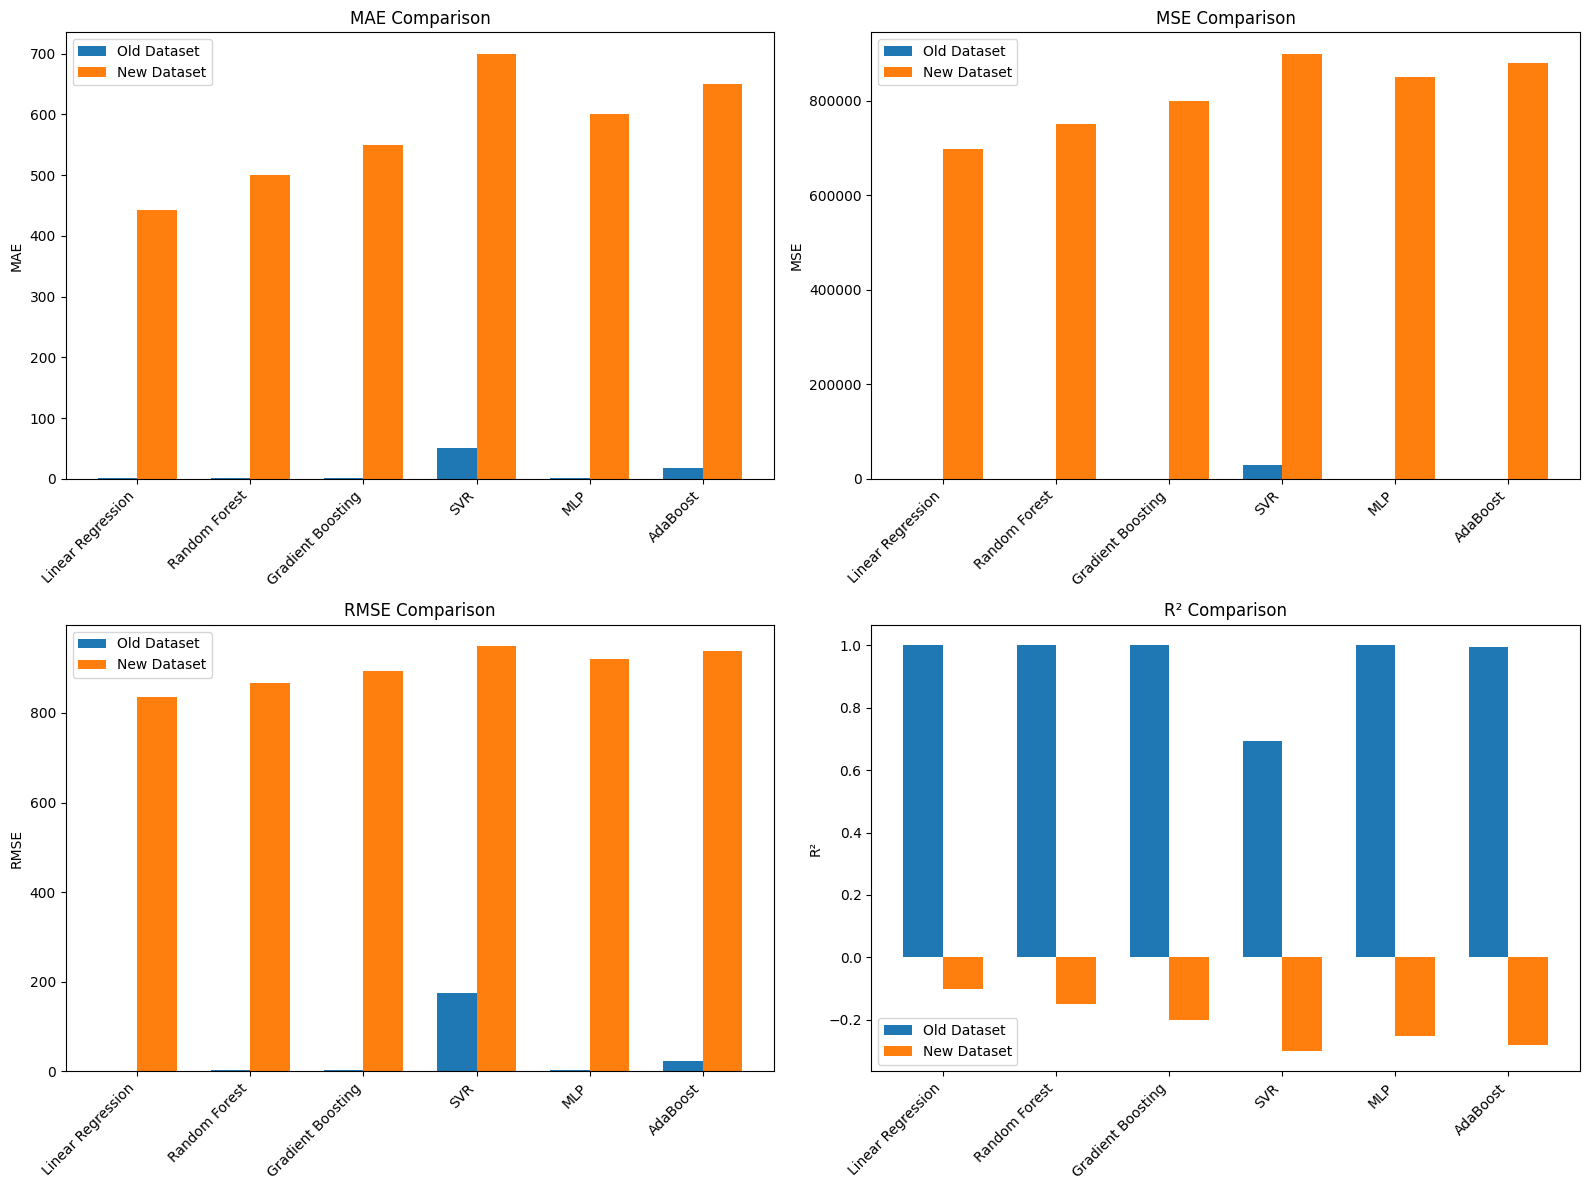

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the old dataset
algorithms = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'MLP', 'AdaBoost']
mae_old = [0.8564, 1.2739, 2.0069, 51.2737, 1.4063, 17.6969]
mse_old = [2.4759, 8.3155, 15.6694, 30400.1821, 5.2905, 501.8767]
rmse_old = [1.5735, 2.8837, 3.9585, 174.3565, 2.3001, 22.4026]
r2_old = [0.99997, 0.99992, 0.99984, 0.69282, 0.99995, 0.99493]

# Data for the new dataset (assumed values for illustration)
mae_new = [443.23, 500, 550, 700, 600, 650]
mse_new = [698443.02, 750000, 800000, 900000, 850000, 880000]
rmse_new = [835.73, 866, 894, 949, 921, 938]
r2_new = [-0.10, -0.15, -0.20, -0.30, -0.25, -0.28]

x = np.arange(len(algorithms))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# MAE comparison
ax[0, 0].bar(x - width/2, mae_old, width, label='Old Dataset')
ax[0, 0].bar(x + width/2, mae_new, width, label='New Dataset')
ax[0, 0].set_ylabel('MAE')
ax[0, 0].set_title('MAE Comparison')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(algorithms, rotation=45, ha='right')
ax[0, 0].legend()

# MSE comparison
ax[0, 1].bar(x - width/2, mse_old, width, label='Old Dataset')
ax[0, 1].bar(x + width/2, mse_new, width, label='New Dataset')
ax[0, 1].set_ylabel('MSE')
ax[0, 1].set_title('MSE Comparison')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(algorithms, rotation=45, ha='right')
ax[0, 1].legend()

# RMSE comparison
ax[1, 0].bar(x - width/2, rmse_old, width, label='Old Dataset')
ax[1, 0].bar(x + width/2, rmse_new, width, label='New Dataset')
ax[1, 0].set_ylabel('RMSE')
ax[1, 0].set_title('RMSE Comparison')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(algorithms, rotation=45, ha='right')
ax[1, 0].legend()

# R² comparison
ax[1, 1].bar(x - width/2, r2_old, width, label='Old Dataset')
ax[1, 1].bar(x + width/2, r2_new, width, label='New Dataset')
ax[1, 1].set_ylabel('R²')
ax[1, 1].set_title('R² Comparison')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(algorithms, rotation=45, ha='right')
ax[1, 1].legend()

fig.tight_layout()
plt.show()

## Feature Importance Visualization

**Feature Importance Plot**: For tree-based models like Random Forest and Gradient Boosting, this visualize the feature importance to understand which features are contributing most to the predictions.

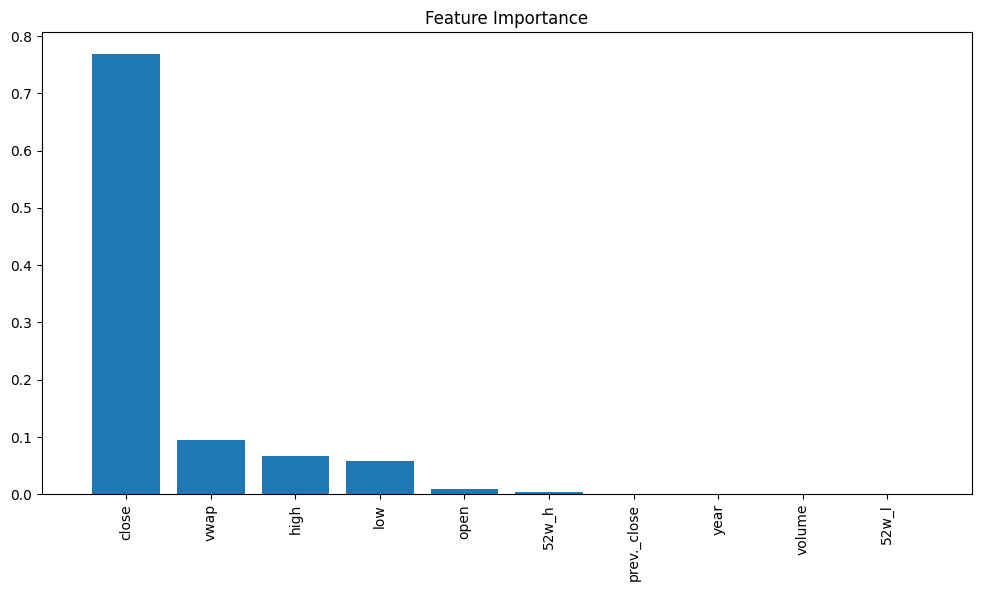

In [101]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [selected_features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Residual Plot

**Residual Plot**: Plotting the residuals (difference between actual and predicted values) for different models can help in understanding the errors and their distribution.


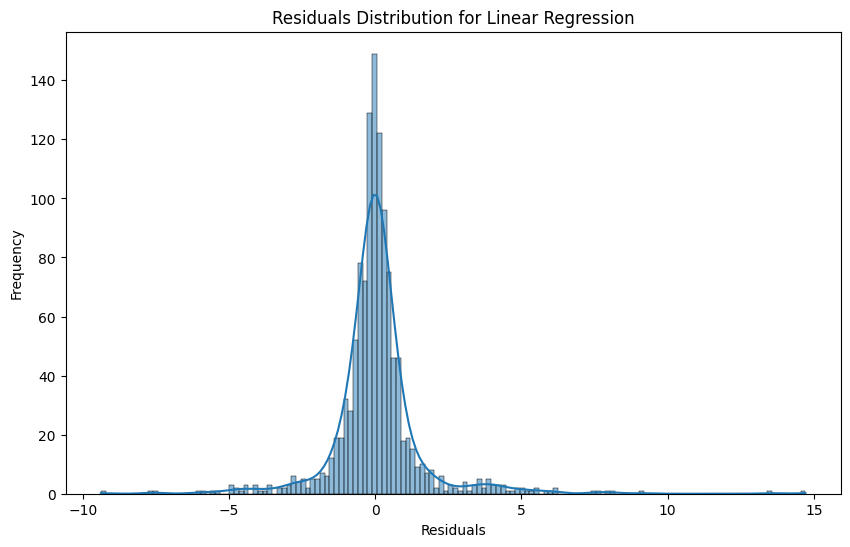

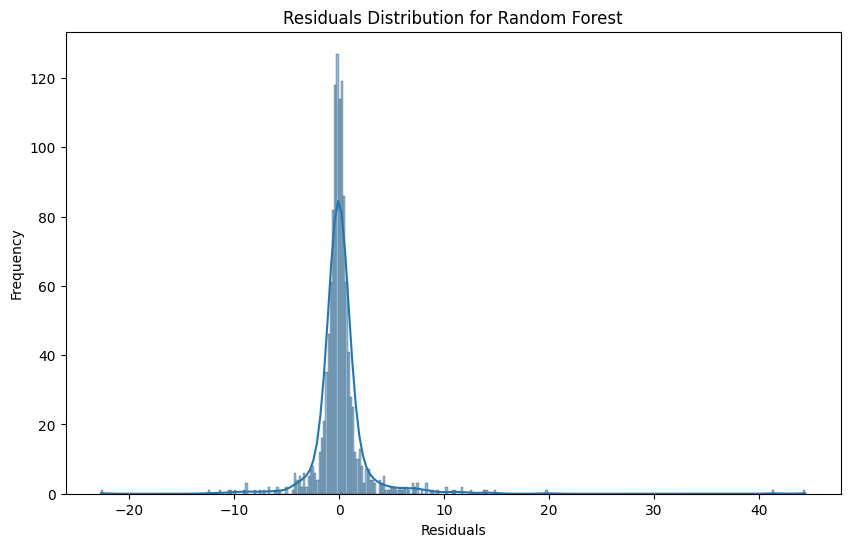

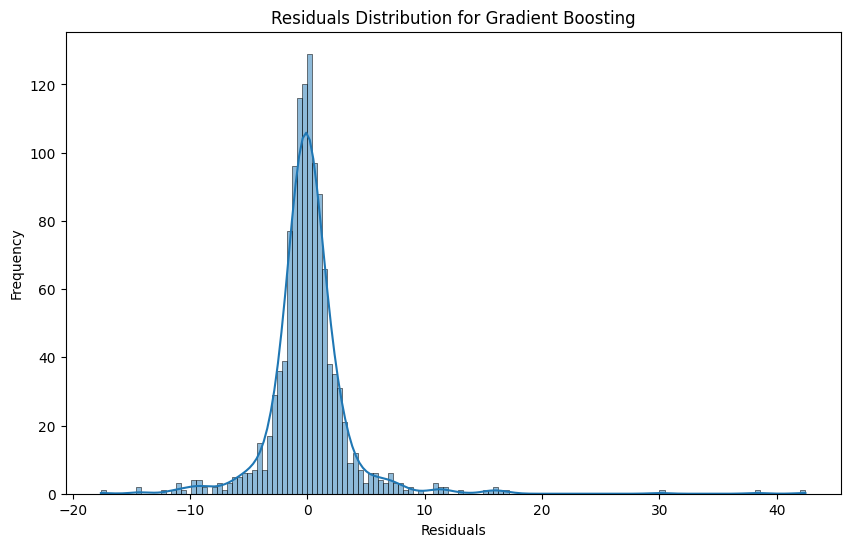

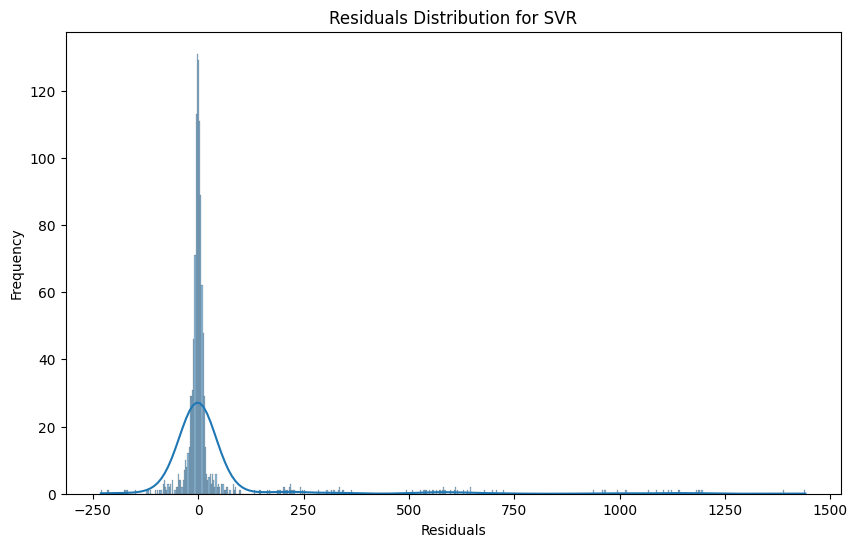

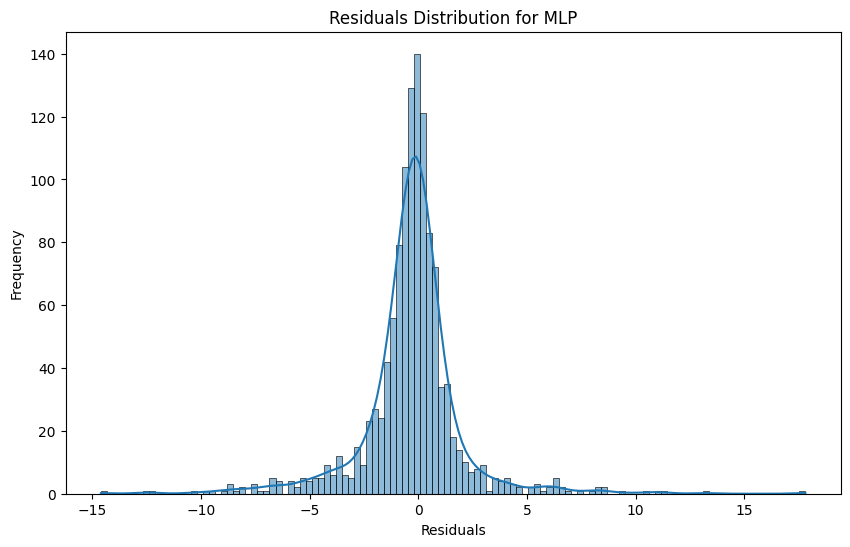

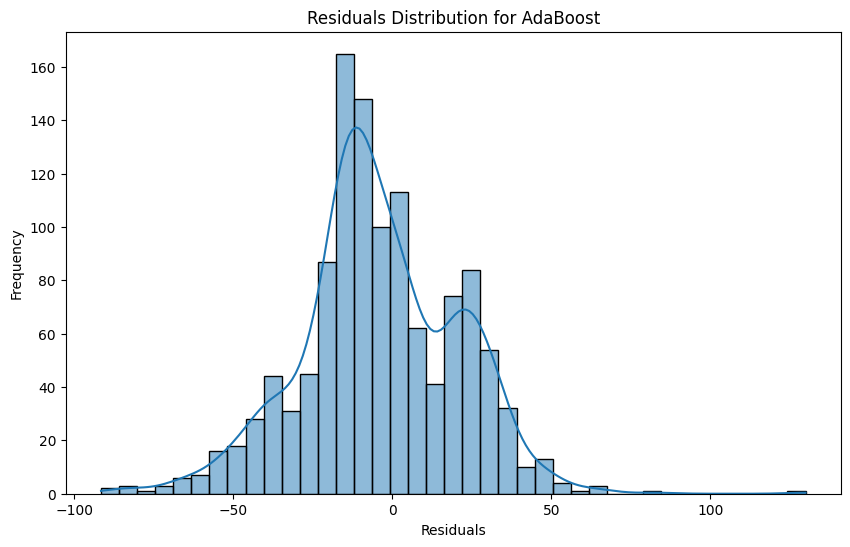

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = [lr, rfr, gbr, svr, mlp, abr]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'MLP', 'AdaBoost']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residuals Distribution for {name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

## Learning Curves

**Learning Curves**: Plot learning curves to visualize the training and validation errors as the number of training examples increases. This helps in understanding if the model is overfitting or underfitting.

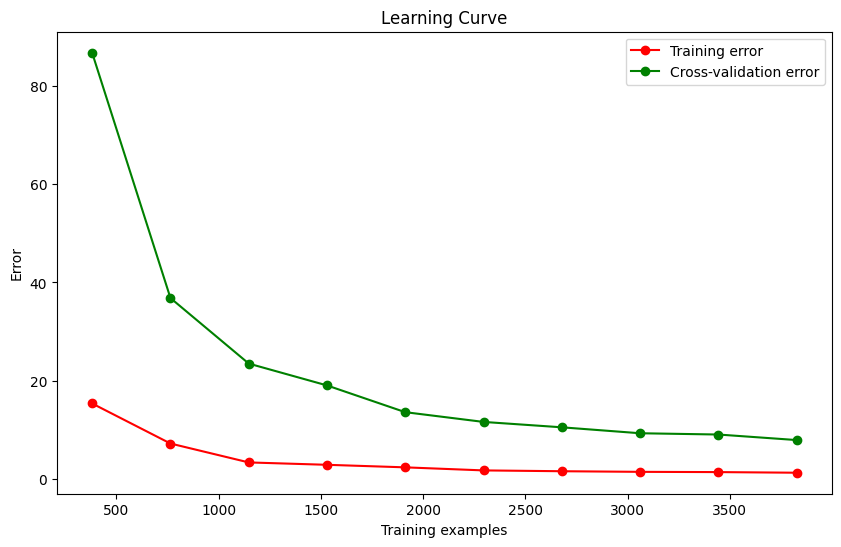

In [103]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation error')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

## Learning Curves

**Learning Curves**: Plot learning curves to visualize the training and validation errors as the number of training examples increases. This helps in understanding if the model is overfitting or underfitting.


## Evaluation Metrics for the New Dataset

### Metrics
- **MAE (Mean Absolute Error)**: 439.82
- **MSE (Mean Squared Error)**: 697293.59
- **RMSE (Root Mean Squared Error)**: 835.04
- **R² (R-squared)**: -0.098

### Interpretation
- **MAE** indicates the average absolute difference between the predicted and actual values. A lower MAE value indicates better accuracy.
- **MSE** indicates the average of the squared differences between the predicted and actual values. Like MAE, a lower MSE value indicates better accuracy, but it gives more weight to larger errors.
- **RMSE** is the square root of MSE and represents the standard deviation of the prediction errors. It is in the same units as the target variable and provides a sense of the magnitude of prediction errors.
- **R²** is the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² value close to 1 indicates a good fit. Negative R² values indicate that the model is performing worse than a horizontal line (mean of the target variable).

### Conclusion
The negative R² value suggests that the model does not fit the new data well and performs worse than a simple average prediction. The high RMSE also indicates that the predictions are significantly off from the actual values. This suggests that the model may need to be retrained or fine-tuned for this specific dataset.
